In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
anscombe = sns.load_dataset('anscombe')
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

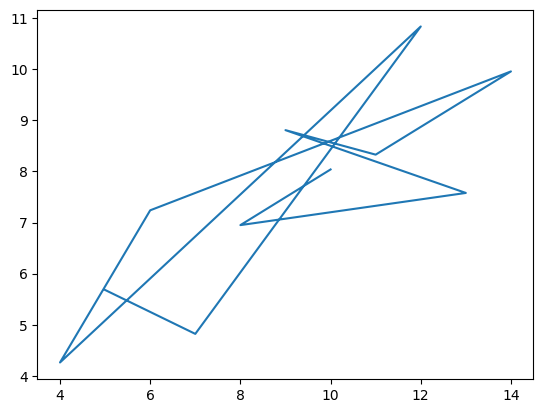

In [9]:
# create a subset of the data
#contains only data set 1 from anscombe

data_set1 = anscombe[anscombe['dataset']=='I']
plt.plot(data_set1['x'], data_set1['y'])
plt.show()

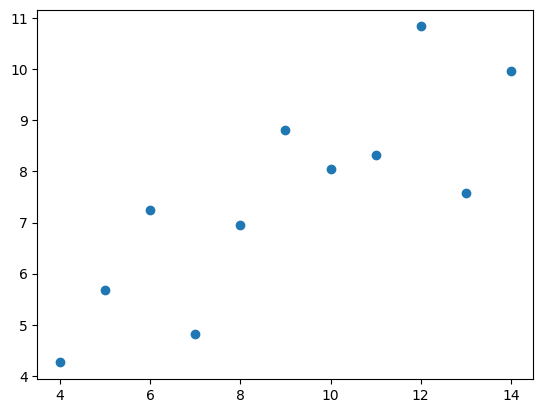

In [11]:
# we can change the ploting to points using 'o' parameter
plt.plot(data_set1['x'], data_set1['y'],'o')
plt.show()

In [13]:
#create more subset
data_set2 = anscombe[anscombe['dataset']=='II']
data_set3 = anscombe[anscombe['dataset']=='III']
data_set4 = anscombe[anscombe['dataset']=='IV']

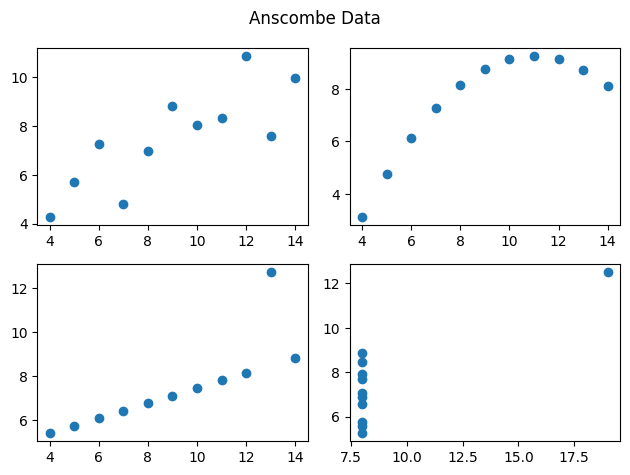

In [21]:
'''
plotting multiple figure
1. create a fig variable to store figure
assign each plot using add_subplot(number_of_rows,number_of_columns,location)
'''

fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

#add a plot to each axis
axes1.plot(data_set1['x'],data_set1['y'],'o')
axes2.plot(data_set2['x'],data_set2['y'],'o')
axes3.plot(data_set3['x'],data_set3['y'],'o')
axes4.plot(data_set4['x'],data_set4['y'],'o')

#add title to plot
fig.suptitle('Anscombe Data')
#change margin to show all information
fig.set_tight_layout(True)
plt.show()

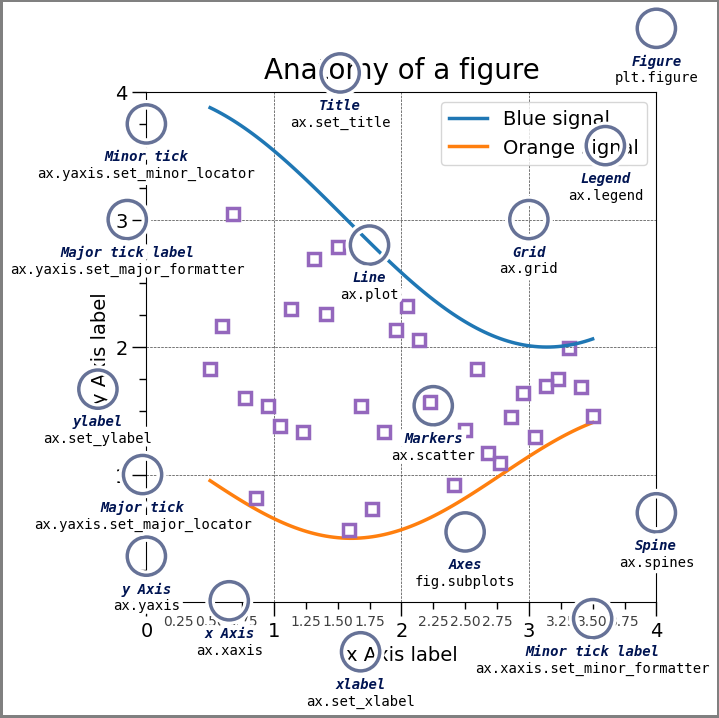

In [23]:
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

In [24]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


## Univariate(Single Variable)
To look at a single variable, histogram is a usual type of graph
The values are 'binned', meaning they are grouped together and plot to see the distribution of the variable.

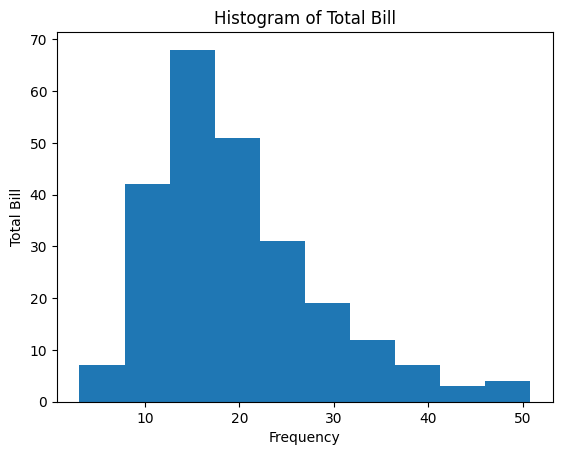

In [28]:
# Univariate (single Variable) using histogram
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data =tips, x = 'total_bill', bins = 10)

#add labels
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

plt.show()

We can iterate the data as follow:
- In our dataFrame, we can see the total bill bill value and the corresponding tips value.
- Plotting the total bills frequecies, seeing the majority of incomes contributes by which segment.

Example: there are more than 50 bills that charged a value lower than 5USD
Bills that charges more than 65USD is in the range of 15-20 bills

## Bivariate
We we want to compare 2 variable, we use the term Bivariate
### Scatter plot
We use scatter plot when a *continous* variable is plotted against another *continuous* variable

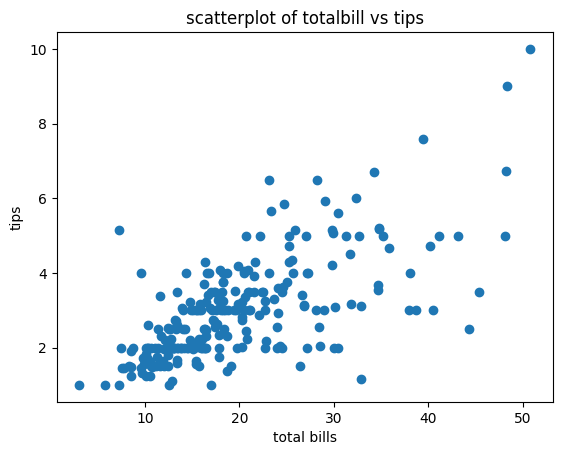

In [30]:
#prep the figure
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

#make the actuall scatter plot
axes1.scatter(data=tips, x='total_bill', y='tip')

# add labels
axes1.set_title('scatterplot of totalbill vs tips')
axes1.set_xlabel('total bills')
axes1.set_ylabel('tips')

plt.show()

### Box plot
Bos plots are used when a discrete variable is plotted against a continous variable
for example, we have 2 discrete variable of sex 'Female' and 'Male'
We want to see if there is a properties that shows connection between them and the tips they are given

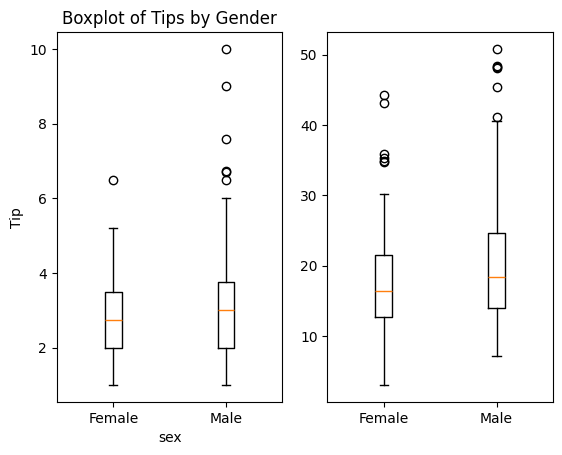

In [34]:
# prep the figure
box_plot = plt.figure()
axes1=box_plot.add_subplot(1,2,1)
axes2=box_plot.add_subplot(1,2,2)
# ploting
axes1.boxplot(
    # Since we are plotting multiple pieces of data
    # we have to put each pieace into a list
    # listitem1 : data of tips given by female
    # listitem2 : data of tips given by male
    x=[
        tips.loc[tips['sex']=='Female','tip'],
        tips.loc[tips['sex']=='Male', 'tip'],
    ],
    #then we pass in an optional labels parameter
    labels=['Female','Male']
    )

axes2.boxplot(
    x=[
        tips.loc[tips['sex']=='Female','total_bill'],
        tips.loc[tips['sex']=='Male','total_bill']
    ],
    labels=['Female','Male']
)

# add labels for the plot
axes1.set_title('Boxplot of Tips by Gender')
axes1.set_xlabel('sex')
axes1.set_ylabel('Tip')
axes2.set_title('Boxplot of totalbills by Gender')
plt.show()

## Multivariate
let us take a look at our data fields again to decide how many variable we are going to include in our chart

In [36]:
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


I am quite greedy, thus except 'smoker','time','day', I will add all the variable to a plot.
How about the same questions: What is the relationship between 'tip' and 'total_bill'? Include also the size of the party as well as the gender.

We plan our plot as follow:
- Show the scatter plot, mapping tips and total bill
- color coding the plot to indicate gender
- the dot size will indicates our party size

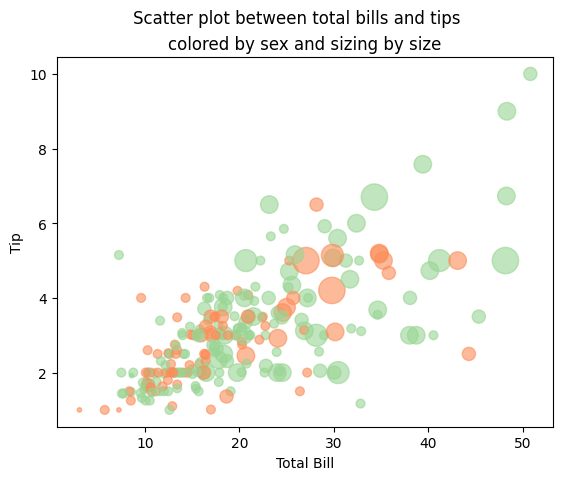

In [56]:
# create the figure
multi_var = plt.figure()
ax = multi_var.add_subplot(1,1,1)


# Assign color value to indicate sex
colors = {
    "Female": "#fc8d59", # Orange
    "Male": "#99d594", # Green
}
# plot the scatter

ax.scatter(
    data=tips,
    x='total_bill',
    y='tip',
    
    # set the colors for sex
    c=tips['sex'].map(colors),
    
    # set alpha for showing overlapping data,
    alpha=0.60,
    
    # Set the dot size
    # as the dot will be map to the figure relative size,
    # we increase the dot size by 10 for readability
    # we also up the size differences by power factor of 2
    # This will diffrentiate the different of size
    
    s=tips['size']** 2 *10
    
)

# set the plot title
multi_var.suptitle('Scatter plot between total bills and tips')
ax.set_title('colored by sex and sizing by size')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()